In [2]:
!pip install torch

In [3]:
import torch
from torch.autograd import Variable
from torch import nn 
from torch import optim

In [38]:
# Создайте случайный FloatTensor размера 3x4x5
tensor = torch.FloatTensor(torch.rand(3,4,5))

In [39]:
# Выведите его форму (shape)
tensor.size()

torch.Size([3, 4, 5])

In [40]:
# Приведите его к форме 6 X 10
tensor = tensor.view(6,10)
tensor

tensor([[0.3814, 0.5191, 0.9181, 0.3312, 0.5767, 0.4381, 0.8117, 0.9652, 0.9546,
         0.6559],
        [0.3887, 0.6700, 0.1186, 0.7295, 0.9962, 0.7074, 0.6006, 0.4262, 0.0868,
         0.8623],
        [0.0958, 0.0831, 0.2047, 0.8418, 0.3804, 0.4521, 0.5120, 0.8677, 0.3540,
         0.9467],
        [0.0221, 0.1906, 0.5844, 0.0217, 0.6655, 0.0836, 0.8308, 0.7053, 0.8447,
         0.9559],
        [0.1824, 0.9476, 0.9918, 0.3257, 0.5760, 0.9610, 0.7269, 0.1508, 0.0216,
         0.6894],
        [0.1121, 0.7228, 0.5285, 0.1532, 0.2445, 0.8619, 0.4431, 0.3858, 0.5500,
         0.0882]])

In [45]:
# Умножьте его на вектор [1, 4, 2, 2, 1] поэлементно
tensor = (tensor.view(-1, 5) * torch.FloatTensor([1, 4, 2, 2, 1])).view(6,10)
tensor

tensor([[0.3814, 2.0763, 1.8361, 0.6625, 0.5767, 0.4381, 3.2468, 1.9305, 1.9091,
         0.6559],
        [0.3887, 2.6798, 0.2372, 1.4591, 0.9962, 0.7074, 2.4025, 0.8524, 0.1736,
         0.8623],
        [0.0958, 0.3325, 0.4093, 1.6835, 0.3804, 0.4521, 2.0479, 1.7354, 0.7080,
         0.9467],
        [0.0221, 0.7625, 1.1687, 0.0435, 0.6655, 0.0836, 3.3233, 1.4105, 1.6894,
         0.9559],
        [0.1824, 3.7904, 1.9835, 0.6513, 0.5760, 0.9610, 2.9077, 0.3016, 0.0431,
         0.6894],
        [0.1121, 2.8911, 1.0570, 0.3063, 0.2445, 0.8619, 1.7723, 0.7716, 1.1000,
         0.0882]])

In [48]:
# Умножьте тензор матрично на себя, чтобы результат был размерности 6x6
torch.mm(tensor, tensor.transpose(0, 1))

tensor([[27.1345, 18.3414, 14.9829, 21.5519, 23.3236, 18.1096],
        [18.3414, 18.2823, 11.5188, 13.4184, 20.7475, 14.5247],
        [14.9829, 11.5188, 12.0736, 12.4527, 11.0009,  8.2339],
        [21.5519, 13.4184, 12.4527, 19.2010, 16.5246, 12.6111],
        [23.3236, 20.7475, 11.0009, 16.5246, 29.0372, 19.7385],
        [18.1096, 14.5247,  8.2339, 12.6111, 19.7385, 15.3390]])

In [69]:
# Посчитайте производную функции y = x**3 + z - 75t в точке (1, 0.5, 2)
x = torch.tensor(1.0, requires_grad = True)
z = torch.tensor(0.5, requires_grad = True)
t = torch.tensor(2.0, requires_grad = True)
y = x**3 + z - 75*t
y.backward()
print(f'{x.grad.item()=}\n{z.grad.item()=}\n{t.grad.item()=}')

x.grad.item()=3.0
z.grad.item()=1.0
t.grad.item()=-75.0


In [70]:
# Создайте единичный тензор размера 5x6
ones = torch.ones(5,6)
ones

tensor([[1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.]])

In [75]:
# Переведите его в формат numpy
type(ones.numpy())

numpy.ndarray

In [206]:
# Давайте теперь пооптимизируем: возьмите функцию y = x**w1 - 2 * x**2 + 5
# Посчитайте 

In [59]:
def func(w, x):
    return x**w1 - 2*x**2 + 5

In [60]:
w1 = 2 # примем коэффициент w1 равным 2, оптимизатор должен будет прийти к этому значению

In [61]:
x = Variable(torch.square(torch.randn(5)), requires_grad=True)
x

tensor([0.3532, 0.0961, 0.2820, 0.5417, 1.8658], requires_grad=True)

In [62]:
y = func(w1, x)
y # полученные истинные значения

tensor([4.8752, 4.9908, 4.9205, 4.7066, 1.5190], grad_fn=<AddBackward0>)

In [64]:
w1 = torch.rand(1)  # получаем случайный коэффициент
w1.requires_grad_()

tensor([0.0304], requires_grad=True)

In [65]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD([w1], lr=0.5)

In [66]:
# для примера вывод предсказаний со случайным коэффициентом, они конечно будут отличаться от истинных значений
func(w1, x)

tensor([ 5.7194,  5.9129,  5.8032,  5.3947, -0.9430], grad_fn=<AddBackward0>)

In [67]:
y_pred = []
EPOHS = 200
for i in range(EPOHS):
    optimizer.zero_grad()
    pred = func(w1, x)
    #print(pred)
    loss = criterion(pred, y)
    print('loss: ', loss.item()) 
    
    loss.backward(retain_graph=True)
    optimizer.step()
    
    print(f'iteration {i}, {w1=}, y={func(w1, x)}')
    y_pred.append(func(w1, x).detach().numpy())
    
    if(loss.item()==0): break

loss:  1.7753397226333618
iteration 0, w1=tensor([1.2138], requires_grad=True), y=tensor([5.0332, 5.0398, 5.0561, 4.8883, 0.1698], grad_fn=<AddBackward0>)
loss:  0.3798152208328247
iteration 1, w1=tensor([1.6012], requires_grad=True), y=tensor([4.9394, 5.0050, 4.9727, 4.7878, 0.7524], grad_fn=<AddBackward0>)
loss:  0.12026864290237427
iteration 2, w1=tensor([1.8689], requires_grad=True), y=tensor([4.8935, 4.9941, 4.9348, 4.7311, 1.2456], grad_fn=<AddBackward0>)
loss:  0.015176193788647652
iteration 3, w1=tensor([1.9801], requires_grad=True), y=tensor([4.8778, 4.9912, 4.9225, 4.7102, 1.4760], grad_fn=<AddBackward0>)
loss:  0.0003735333157237619
iteration 4, w1=tensor([1.9988], requires_grad=True), y=tensor([4.8754, 4.9908, 4.9206, 4.7068, 1.5163], grad_fn=<AddBackward0>)
loss:  1.4740147662450909e-06
iteration 5, w1=tensor([1.9999], requires_grad=True), y=tensor([4.8752, 4.9908, 4.9205, 4.7066, 1.5188], grad_fn=<AddBackward0>)
loss:  3.184641217401918e-09
iteration 6, w1=tensor([2.0000]

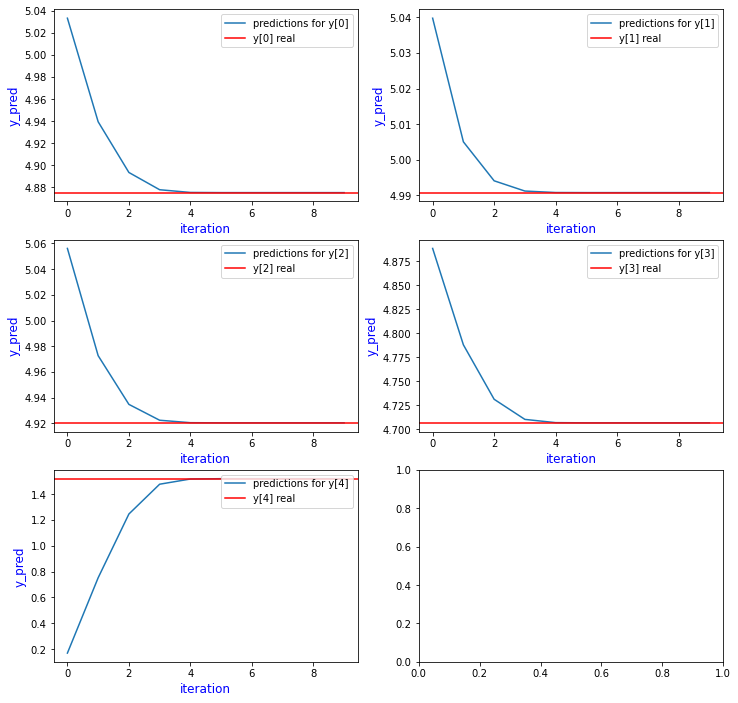

In [75]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(3,2, figsize = (12,12))
for i, ax in enumerate(axes.flatten()):
    if i == len(y): break
    y_predi = [y[i] for y in y_pred]
    ax.plot(y_predi, label=f'predictions for y[{i}]')
    ax.axhline(y.detach().numpy()[i], color='r', linestyle='-', label=f'y[{i}] real')
    ax.set_xlabel('iteration', fontsize=12, color='blue')
    ax.set_ylabel('y_pred', fontsize=12, color='blue')
    ax.legend(loc='upper right')